#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/cf3027ec601945c5bcfcfe5059b3af5b

In [206]:
import numpy as np
import pandas as pd
import urllib.request
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor
from catboost import Pool, CatBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPClassifier
from dython import nominal
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [229]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("hospital_train.csv", index_col=0)
headers = pd.read_csv("columns_meaning.csv", index_col=0)
headers = headers.to_dict('index')

In [6]:
for i in headers:
    print(headers[i]["Description"])

Case_ID registered in Hospital
Unique code for the Hospital
Unique code for the type of Hospital
City Code of the Hospital
Region Code of the Hospital
Number of Extra rooms available in the Hospital
Department overlooking the case
Code for the Ward type
Code for the Ward Facility
Condition of Bed in the Ward
Unique Patient Id
City Code for the patient
Admission Type registered by the Hospital
Severity of the illness recorded at the time of admission
Number of Visitors with the patient
Age of the patient
Deposit at the Admission Time
Stay Days by the patient


In [230]:
df.columns = ['Unique code for the Hospital', "Unique code for the type of Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Number of Extra rooms available in the Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility", "Condition of Bed in the Ward", "Unique Patient Id", "City Code for the patient", "Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Number of Visitors with the patient", "Age of the patient", "Deposit at the Admission Time", "Stay Days by the patient"]
df.index.names = ['Case_ID registered in Hospital']

In [247]:
df

,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time,Stay Days by the patient,Staynew,s
Case_ID registered in Hospital,,,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10,11-20,21-30
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30,21-30,21-30
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20,11-20,21-30
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60,51-60,51-60
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60,51-60,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days,51-60,51-60
254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60,51-60,11-20
69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40,21-30,21-30


In [ ]:
#X = np.array(df[["carat", "cut",  "color", "clarity", "depth",  "table", "x", "y", "z"]]) #without cut, depth
#y = np.array(df["price"])
#X.shape

In [ ]:
#model2 = CatBoostRegressor(learning_rate=0.05, depth=6, l2_leaf_reg=1, iterations=150)

#grid = {'learning_rate': [0.05],
        'depth': [6],
        'l2_leaf_reg': [1]}

#grid_search_result = model2.grid_search(grid, 
                                       #X, 
                                       #y, 
                                      # plot=True) #cat_features=[1, 2, 3]

In [246]:
df.head()

,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time,Stay Days by the patient,Staynew,s
Case_ID registered in Hospital,,,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10,11-20,21-30
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30,21-30,21-30
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20,11-20,21-30
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60,51-60,51-60
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60,51-60,21-30


In [ ]:
category = "Unique code for the type of Hospital", "Region Code of the Hospital", "Department overlooking the case", "Code for the Ward type", "Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Age of the patient", "Code for the Ward Facility"

numeric = "Unique code for the Hospital", "City Code of the Hospital", "Number of Extra rooms available in the Hospital", "Condition of Bed in the Ward",  "City Code for the patient", "Number of Visitors with the patient", "Deposit at the Admission Time"

In [58]:
#df = df.drop(columns=["Stay Days by the patient"])

In [353]:
train, test = train_test_split(df, test_size=0.2, random_state=456544)

In [164]:
train=train.fillna(train.mean())
test=test.fillna(test.mean())

In [352]:
conditions = [(df['Stay Days by the patient'] == '0-10'), 
    (df['Stay Days by the patient'] == '11-20'),
    (df['Stay Days by the patient'] == '21-30'),
    (df['Stay Days by the patient'] == '31-40'),
    (df['Stay Days by the patient'] == '41-50'),
    (df['Stay Days by the patient'] == '51-60'),
    (df['Stay Days by the patient'] == '61-70'),
    (df['Stay Days by the patient'] == '71-80'),
    (df['Stay Days by the patient'] == '81-90'),
    (df['Stay Days by the patient'] == '91-100'),
    (df['Stay Days by the patient'] == 'More than 100 Days')] 
values = ['11-20', '11-20', '21-30', '21-30', '51-60', '51-60', '51-60', '51-60', '51-60', 'More than 100 Days', 'More than 100 Days']
df['Staynew'] = np.select(conditions, values)

In [225]:
lb_make = LabelEncoder()
df['Unique code for the type of Hospital'] = lb_make.fit_transform(df['Unique code for the type of Hospital'])
df['Condition of Bed in the Ward'] = lb_make.fit_transform(df['Condition of Bed in the Ward'])
df['City Code for the patient'] = lb_make.fit_transform(df['City Code for the patient'])
df['Region Code of the Hospital'] = lb_make.fit_transform(df['Region Code of the Hospital'])
df['Department overlooking the case'] = lb_make.fit_transform(df['Department overlooking the case'])
df['Code for the Ward type'] = lb_make.fit_transform(df['Code for the Ward type'])
df['Admission Type registered by the Hospital'] = lb_make.fit_transform(df['Admission Type registered by the Hospital'])
df['Severity of the illness recorded at the time of admission'] = lb_make.fit_transform(df['Severity of the illness recorded at the time of admission'])
df['Age of the patient'] = lb_make.fit_transform(df['Age of the patient'])
df['Code for the Ward Facility'] = lb_make.fit_transform(df['Code for the Ward Facility'])
df['Age of the patient'] = lb_make.fit_transform(df['Age of the patient'])
df['Stay Days by the patient'] = lb_make.fit_transform(df['Stay Days by the patient'])

In [226]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'Stay Days by the patient').index
columns

Index(['Stay Days by the patient', 'Number of Visitors with the patient',
       'Code for the Ward type', 'Age of the patient',
       'Unique code for the type of Hospital', 'Unique code for the Hospital',
       'Department overlooking the case', 'Condition of Bed in the Ward',
       'Admission Type registered by the Hospital',
       'Region Code of the Hospital'],
      dtype='object')

In [233]:
df=df.fillna(df.mean())

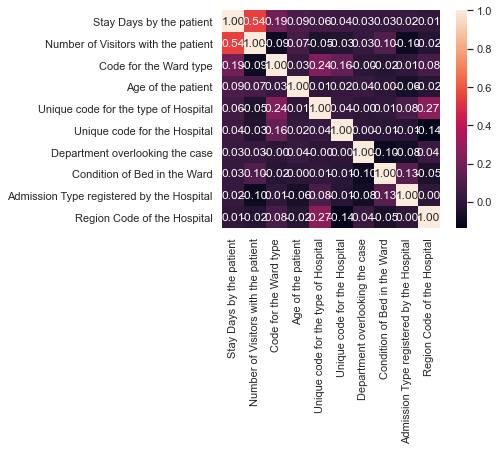

In [227]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [ ]:
listnotused = ["Condition of Bed in the Ward", "City Code for the patient", "Stay Days by the patient", "Staynew",  "Deposit at the Admission Time", "Number of Extra rooms available in the Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Department overlooking the case", "Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Code for the Ward Facility"]

In [291]:
print(df['Number of Visitors with the patient'].quantile(0.50)) 
print(df['Number of Visitors with the patient'].quantile(0.95)) 
df['Number of Visitors with the patient'] = np.where(df['Number of Visitors with the patient'] > 6, 3, df['Number of Visitors with the patient'])
#df.describe()

3.0
6.0


In [354]:
tree_preprocessor = ColumnTransformer(
    [
        ("categorical", OrdinalEncoder(),
            ["Unique code for the type of Hospital", "Code for the Ward type", "Age of the patient"]), #columnas categoricas
        ("numeric", "passthrough",
            ["Unique code for the Hospital", "Number of Visitors with the patient",]), #columnas int o float
    ],
    remainder="drop",
)

pipe = Pipeline([
    ("preprocessor", tree_preprocessor),
    ("regressor", RandomForestClassifier(max_depth=6, n_estimators=100))])

pipe.fit(train, train["Staynew"])
                 #regressor__sample_weight=None)

print("Accuracy Score:")
u = pipe.predict(train)
y_train = train["Stay Days by the patient"]
print("Train Score: ", accuracy_score(u, y_train))
t = pipe.predict(test)
y_test = test["Stay Days by the patient"]
print("Test Score: ", accuracy_score(t, y_test))
s = pipe.predict(df)
df_test = df["Stay Days by the patient"]
print("DF Score: ", accuracy_score(s, df_test))

Accuracy Score:
Train Score:  0.3446
Test Score:  0.3468
DF Score:  0.34504


In [341]:
df["s"] = s

In [342]:
df.to_csv("dm.csv", index = False)

In [7]:
X = np.array(df[["Unique code for the Hospital", "City Code of the Hospital", "Number of Extra rooms available in the Hospital", "Number of Visitors with the patient", "Deposit at the Admission Time", "Unique code for the type of Hospital", "Region Code of the Hospital", "Department overlooking the case", "Code for the Ward type", "Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Age of the patient", "Code for the Ward Facility"]])
y = np.array(df[["Stay Days by the patient"]])

In [ ]:
#reg1 = GradientBoostingRegressor(random_state=1)
#reg2 = RandomForestRegressor(random_state=1)
#reg3 = LinearRegression()
#ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

In [104]:
df2 = df.drop(columns=['Stay Days by the patient'])

In [105]:
df2["Stay Days by the patient"] = 0

In [106]:
df2

,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time,Stay Days by the patient
Case_ID registered in Hospital,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,0
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,0
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,0
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,0
254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,0
69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,0


In [45]:
h = poisson_gbrt.predict(df2)

In [46]:
h.shape

(100000,)

In [47]:
h

array(['21-30', '21-30', '21-30', ..., '21-30', '21-30', '21-30'],
      dtype='<U18')

**Importante:**

   - Si quitas columnas o creas columnas nuevas a partir de otras, o cualquier modificación column-wise tendrás que aplicarlo al dataset de `titanic_test.csv` de cara a hacer la predicción.
   - Si por lo contrario, decides por ejemplo, quitar los outliers o hacer un `dropna()`, o cualquier modificación row-wise eso NO PODRÁS (ni debes) aplicarlo al dataset de `titanic_test.csv` de cara a hacer la predicción. ¿Por qué? Porque si el conjunto de test tiene 50 observaciones (filas) la predicción se espera que tenga 50 filas.

#### ¿Y si lo que hago es estandarizar los datos o hacer un encoding, también se lo tengo que hacer al test antes de predecir?

In [5]:
# ¿qué opináis? 

-----------------------------------------------------------------------------------------------------------------

### Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

#### ¿Y si después del análisis exploratorio de mis datos llego a la conclusión de que puedo predecir el precio solo con las columnas `x`, `y` y `z`, también aplica al test?

In [8]:
# ¿qué opináis?

### 2. Dividir X_train, X_test, y_train, y_test

### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros. 

**Consejo**: Usa GridSearch y vuélvete loca o loco probando modelos e hiperparámetros.

Siempre hay tiempo para una historia:
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html

### 4. Entrenar el modelo con X_train, y_train

### 5. Predecir con el modelo ya entrenado con X_test

### 6. Sacar métricas, valorar el modelo 

Recuerdo que en la competición se va a evaluar con la métrica de RMSE.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

_Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `diamonds_test.csv` nos arriesgamos a que digamos, no salga lo esperado._

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `diamonds_train.csv` al completo.

**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**

Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [258]:
X_pred = pd.read_csv("hospital_test.csv", index_col=0)
X_pred.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0


In [259]:
X_pred.columns = ['Unique code for the Hospital', "Unique code for the type of Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Number of Extra rooms available in the Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility", "Condition of Bed in the Ward", "Unique Patient Id", "City Code for the patient", "Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Number of Visitors with the patient", "Age of the patient", "Deposit at the Admission Time", ]
X_pred.index.names = ['Case_ID registered in Hospital']

In [250]:
X_pred

,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time
Case_ID registered in Hospital,,,,,,,,,,,,,,,,
314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0


In [260]:
X_pred["Stay Days by the patient"] = 0
X_pred["Staynew"] = 0
X_pred["s"] = 0

In [253]:
X_pred.shape

(133744, 19)

**¿Por qué da error?** 

In [243]:
X_pred=X_pred.fillna(X_pred.mean())

In [355]:
predictions_submit = poisson_gbrt.predict(X_pred)
predictions_submit

array(['11-20', '51-60', '21-30', ..., '21-30', '21-30', '21-30'],
      dtype=object)

In [330]:
predictions_submit = predictions_submit.ravel()

In [338]:
predictions_submit.shape

(133744,)

## IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 13449 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `diamonds_test.csv`?**

In [ ]:
# ¿Qué opináis?

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

**¿Qué más habrá que quitar o hacer?**

In [ ]:
# ¿Qué opináis?

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

**Truqui**: Carga X que debe estar actualmente actualizada a cómo la usaste para entrenar a `model` y haz que `to_pred` sea igual. ¡Sin quitar filas!

Porque:
    - SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 3 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
# respuestas

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `diamonds_test.csv`?**

In [145]:
sample = pd.read_csv("sample_submission.csv")

In [146]:
sample.head()

,id,days
0,314114,11-20
1,208989,31-40
2,305872,81-90
3,266099,21-30
4,13228,31-40


In [147]:
sample.shape

(133744, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [148]:
id = np.array(sample["id"])

In [90]:
id

array([314114, 208989, 305872, ..., 180676,  39933, 116673], dtype=int64)

In [356]:
submission = pd.DataFrame({"id": id, "days": predictions_submit})

In [357]:
submission.head()

,id,days
0,314114,11-20
1,208989,51-60
2,305872,21-30
3,266099,21-30
4,13228,21-30


In [23]:
submission.shape

(133744, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [24]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [45]:
help(chequeator)

Help on function chequeator in module __main__:

chequeator(df_to_submit)
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.



In [358]:
chequeator(submission)

You're ready to submit!
